In [37]:
import os
import kagglehub
import pandas as pd

In [38]:
# Download latest version
path = kagglehub.dataset_download("manishabhatt22/marketing-campaign-performance-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/mac/.cache/kagglehub/datasets/manishabhatt22/marketing-campaign-performance-dataset/versions/1


In [39]:
# 2. List files in the downloaded directory (might be nested)
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)
            break  # Use the first CSV file found

# 3. Load the CSV
df = pd.read_csv(csv_path)

# 4. Preview the data
display("Loaded:", csv_path)
display(df.head())

'Loaded:'

'/Users/mac/.cache/kagglehub/datasets/manishabhatt22/marketing-campaign-performance-dataset/versions/1/marketing_campaign_dataset.csv'

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [40]:
display(df.columns)

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [41]:
display(df['Campaign_Type'].value_counts())

Campaign_Type
Influencer      40169
Search          40157
Display         39987
Email           39870
Social Media    39817
Name: count, dtype: int64

In [42]:
display(df['Channel_Used'].value_counts())

Channel_Used
Email         33599
Google Ads    33438
YouTube       33392
Instagram     33392
Website       33360
Facebook      32819
Name: count, dtype: int64

In [43]:
display(df['Location'].value_counts())

Location
Miami          40269
New York       40024
Chicago        40010
Los Angeles    39947
Houston        39750
Name: count, dtype: int64

In [36]:
# 1. Location 컬럼의 고유값 가져오기
locations = df['Location'].unique()  # 대소문자 주의!

# 2. 공백 포함된 값 찾기 (양쪽 또는 중간 포함 모두)
has_whitespace = [loc for loc in locations if isinstance(loc, str) and (' ' in loc or loc != loc.strip())]

# 3. 결과 출력
if has_whitespace:
    print("🔍 공백이 포함된 Location 값:")
    for loc in has_whitespace:
        print(f"'{loc}'")
else:
    print("✅ 공백 포함된 Location 값 없음!")



🔍 공백이 포함된 Location 값:
'New York'
'Los Angeles'


In [44]:
df

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10


In [57]:
map_df_by_company = dict()
for company in df["Company"].unique():
    d = df[df["Company"] == company]
    map_df_by_company[company] = d
    print(f"\n{company}'s DataFrame")
    display(d)


Innovate Industries's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
11,12,Innovate Industries,Influencer,Men 25-34,60 days,Google Ads,0.05,"$17,502.00",3.59,Los Angeles,Mandarin,659,8948,1,Foodies,2021-01-12
15,16,Innovate Industries,Social Media,Women 35-44,60 days,YouTube,0.11,"$9,407.00",2.91,New York,German,299,1512,5,Health & Wellness,2021-01-16
16,17,Innovate Industries,Display,Women 35-44,45 days,Website,0.08,"$5,478.00",4.53,Houston,English,931,2488,3,Fashionistas,2021-01-17
23,24,Innovate Industries,Email,Women 25-34,15 days,Facebook,0.04,"$17,608.00",7.31,Miami,Spanish,764,2157,8,Health & Wellness,2021-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199956,199957,Innovate Industries,Social Media,Men 25-34,45 days,Website,0.13,"$17,304.00",3.09,Los Angeles,Spanish,333,1403,6,Tech Enthusiasts,2021-10-29
199959,199960,Innovate Industries,Social Media,Women 35-44,60 days,Instagram,0.12,"$15,458.00",7.14,Miami,Spanish,851,5935,4,Outdoor Adventurers,2021-11-01
199966,199967,Innovate Industries,Email,All Ages,45 days,Instagram,0.03,"$5,371.00",5.92,Chicago,Spanish,728,7857,2,Foodies,2021-11-08
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10



NexGen Systems's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05
6,7,NexGen Systems,Email,Women 35-44,60 days,Website,0.13,"$11,067.00",2.86,Los Angeles,Spanish,817,8749,10,Tech Enthusiasts,2021-01-07
10,11,NexGen Systems,Display,Men 25-34,45 days,Email,0.12,"$8,590.00",3.49,New York,Spanish,321,6628,10,Tech Enthusiasts,2021-01-11
22,23,NexGen Systems,Social Media,Women 35-44,15 days,YouTube,0.13,"$8,699.00",2.12,Miami,French,646,3841,5,Health & Wellness,2021-01-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199965,199966,NexGen Systems,Social Media,All Ages,15 days,YouTube,0.08,"$18,098.00",3.09,Chicago,German,247,2978,4,Foodies,2021-11-07
199967,199968,NexGen Systems,Influencer,Women 35-44,45 days,Website,0.05,"$18,261.00",6.60,Houston,Mandarin,398,5009,2,Foodies,2021-11-09
199969,199970,NexGen Systems,Social Media,All Ages,60 days,Instagram,0.14,"$14,899.00",7.08,New York,Spanish,753,9673,4,Outdoor Adventurers,2021-11-11
199981,199982,NexGen Systems,Social Media,All Ages,30 days,Website,0.08,"$6,396.00",4.54,Los Angeles,German,576,5294,8,Outdoor Adventurers,2021-11-23



Alpha Innovations's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
8,9,Alpha Innovations,Social Media,Women 35-44,15 days,Facebook,0.09,"$18,066.00",6.73,Chicago,German,861,1754,6,Tech Enthusiasts,2021-01-09
17,18,Alpha Innovations,Influencer,Men 18-24,15 days,Instagram,0.14,"$9,485.00",4.48,Miami,French,218,9264,9,Health & Wellness,2021-01-18
18,19,Alpha Innovations,Social Media,Men 25-34,60 days,Google Ads,0.07,"$19,224.00",6.08,New York,French,182,5798,1,Foodies,2021-01-19
26,27,Alpha Innovations,Email,Women 25-34,45 days,Facebook,0.09,"$9,182.00",6.03,Houston,English,953,6916,5,Fashionistas,2021-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199971,199972,Alpha Innovations,Social Media,Men 18-24,30 days,Google Ads,0.12,"$13,261.00",2.78,Los Angeles,English,504,7689,4,Health & Wellness,2021-11-13
199972,199973,Alpha Innovations,Search,Women 25-34,30 days,Instagram,0.14,"$11,639.00",5.31,Houston,Spanish,833,8602,5,Fashionistas,2021-11-14
199978,199979,Alpha Innovations,Email,Women 35-44,15 days,Email,0.14,"$18,003.00",2.25,Houston,English,716,2687,1,Health & Wellness,2021-11-20
199982,199983,Alpha Innovations,Search,Women 25-34,15 days,Instagram,0.14,"$13,465.00",7.54,Miami,German,996,4654,3,Tech Enthusiasts,2021-11-24



DataTech Solutions's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
5,6,DataTech Solutions,Display,All Ages,15 days,Instagram,0.07,"$9,716.00",4.36,New York,German,100,1643,1,Foodies,2021-01-06
7,8,DataTech Solutions,Search,Men 18-24,45 days,Google Ads,0.08,"$13,280.00",5.55,Los Angeles,Mandarin,624,7854,7,Outdoor Adventurers,2021-01-08
19,20,DataTech Solutions,Influencer,Men 25-34,15 days,Google Ads,0.09,"$10,258.00",3.83,Miami,French,193,3677,1,Tech Enthusiasts,2021-01-20
20,21,DataTech Solutions,Search,Women 25-34,15 days,Email,0.04,"$16,580.00",7.99,New York,Spanish,975,1561,3,Outdoor Adventurers,2021-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199991,199992,DataTech Solutions,Influencer,Men 18-24,60 days,YouTube,0.09,"$6,697.00",6.21,New York,Spanish,416,2978,7,Fashionistas,2021-12-03
199992,199993,DataTech Solutions,Social Media,Men 18-24,30 days,Instagram,0.10,"$12,704.00",6.56,Houston,German,930,6086,4,Foodies,2021-12-04
199993,199994,DataTech Solutions,Influencer,Women 35-44,15 days,Facebook,0.10,"$18,292.00",3.11,Chicago,Mandarin,455,2995,6,Fashionistas,2021-12-05
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08



TechCorp's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
9,10,TechCorp,Email,Women 35-44,15 days,Instagram,0.09,"$13,766.00",3.78,Los Angeles,English,642,3856,3,Tech Enthusiasts,2021-01-10
12,13,TechCorp,Social Media,Men 25-34,60 days,Facebook,0.09,"$17,189.00",4.91,Chicago,Mandarin,677,8817,10,Tech Enthusiasts,2021-01-13
13,14,TechCorp,Email,Men 25-34,45 days,Instagram,0.14,"$9,975.00",7.06,New York,German,994,2201,4,Health & Wellness,2021-01-14
14,15,TechCorp,Display,All Ages,45 days,Website,0.04,"$11,346.00",5.28,Chicago,Spanish,482,8470,1,Outdoor Adventurers,2021-01-15
21,22,TechCorp,Influencer,All Ages,30 days,Facebook,0.02,"$12,824.00",6.21,New York,French,319,8586,2,Foodies,2021-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199984,199985,TechCorp,Email,Men 18-24,60 days,Website,0.08,"$19,503.00",6.50,Chicago,French,981,6984,4,Outdoor Adventurers,2021-11-26
199985,199986,TechCorp,Search,Women 35-44,30 days,Website,0.04,"$18,294.00",4.58,Houston,German,964,8738,7,Outdoor Adventurers,2021-11-27
199987,199988,TechCorp,Display,Men 18-24,60 days,Website,0.11,"$17,471.00",2.30,New York,German,999,9725,2,Tech Enthusiasts,2021-11-29
199990,199991,TechCorp,Email,Men 25-34,15 days,Website,0.07,"$15,797.00",6.55,Chicago,Mandarin,470,5927,7,Fashionistas,2021-12-02


In [58]:
map_df_by_company

{'Innovate Industries':         Campaign_ID              Company Campaign_Type Target_Audience  \
 0                 1  Innovate Industries         Email       Men 18-24   
 11               12  Innovate Industries    Influencer       Men 25-34   
 15               16  Innovate Industries  Social Media     Women 35-44   
 16               17  Innovate Industries       Display     Women 35-44   
 23               24  Innovate Industries         Email     Women 25-34   
 ...             ...                  ...           ...             ...   
 199956       199957  Innovate Industries  Social Media       Men 25-34   
 199959       199960  Innovate Industries  Social Media     Women 35-44   
 199966       199967  Innovate Industries         Email        All Ages   
 199998       199999  Innovate Industries    Influencer        All Ages   
 199999       200000  Innovate Industries  Social Media     Women 35-44   
 
        Duration Channel_Used  Conversion_Rate Acquisition_Cost   ROI  \
 0

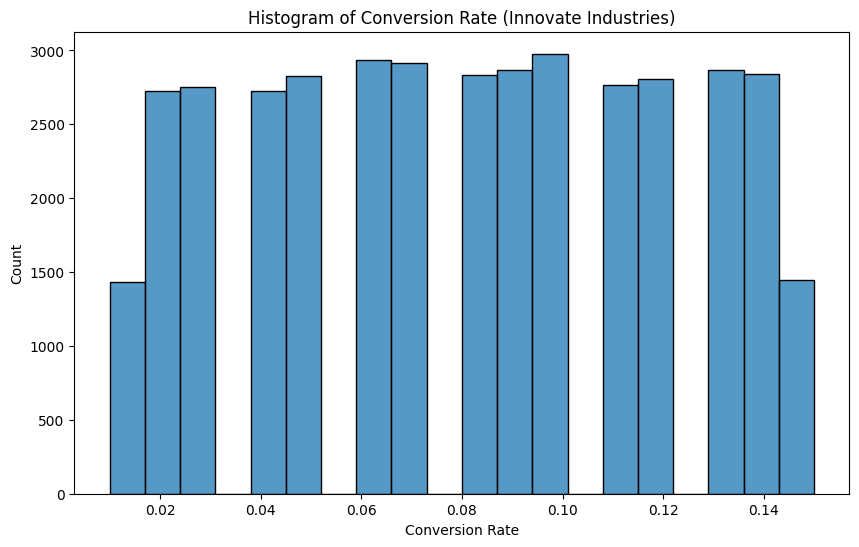

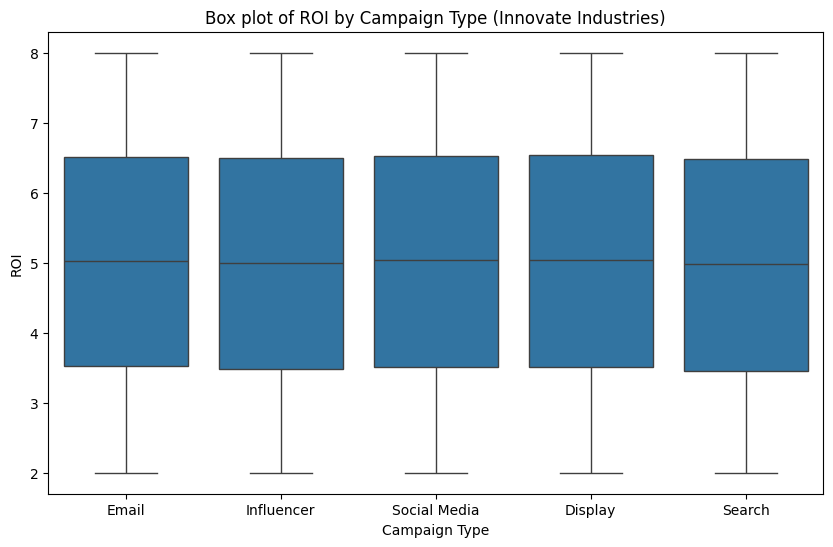

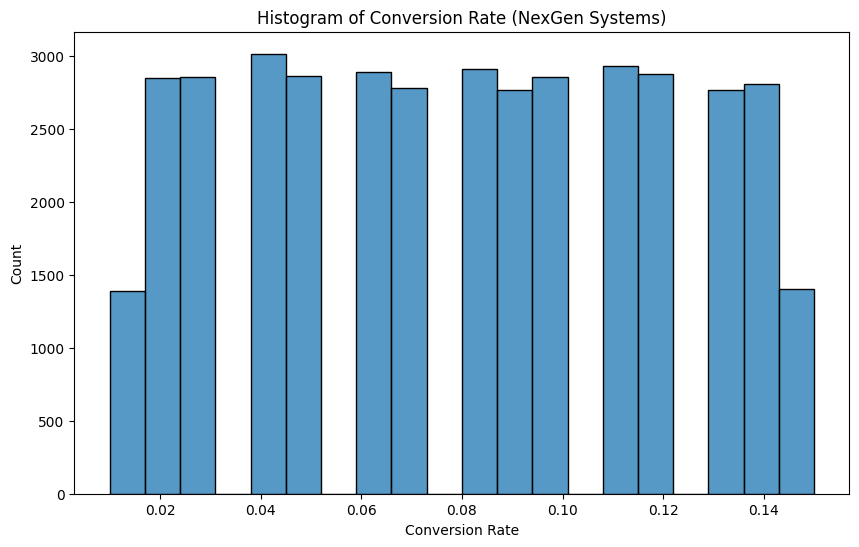

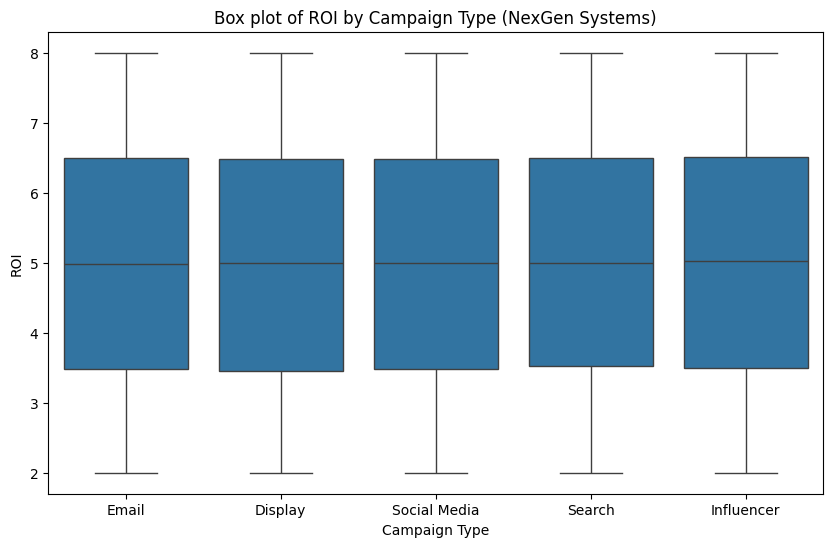

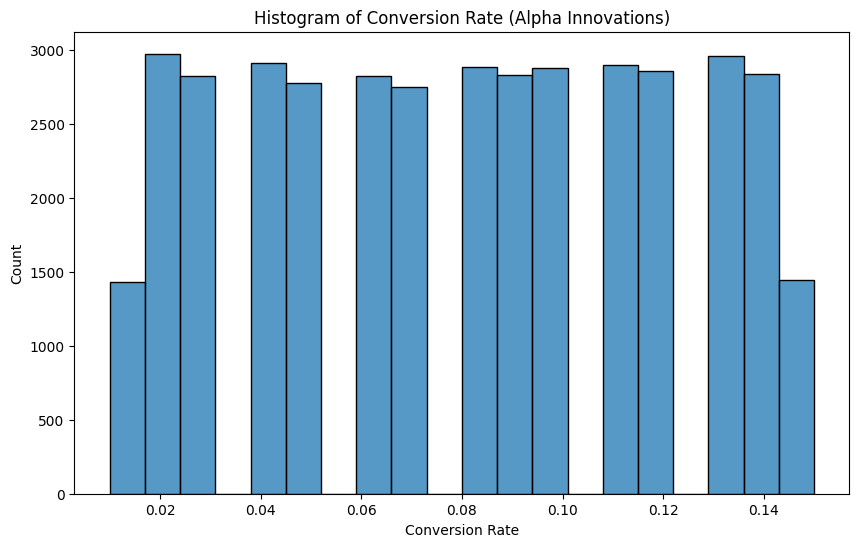

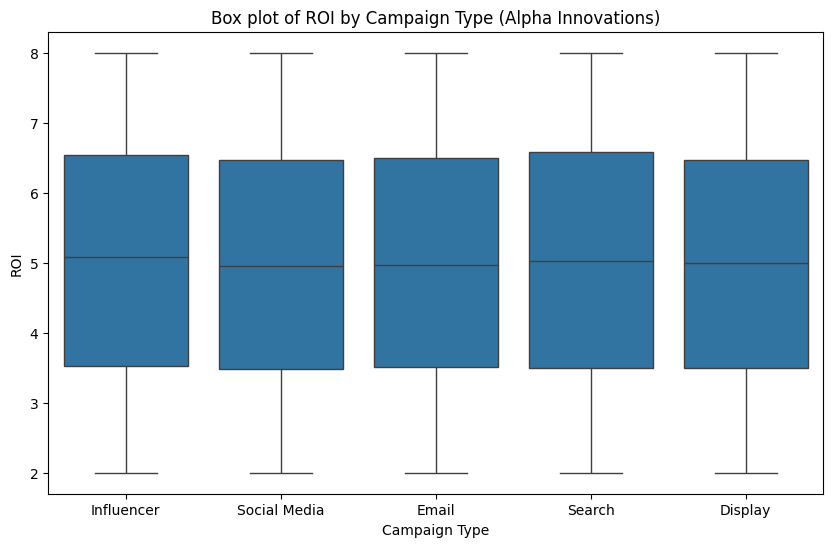

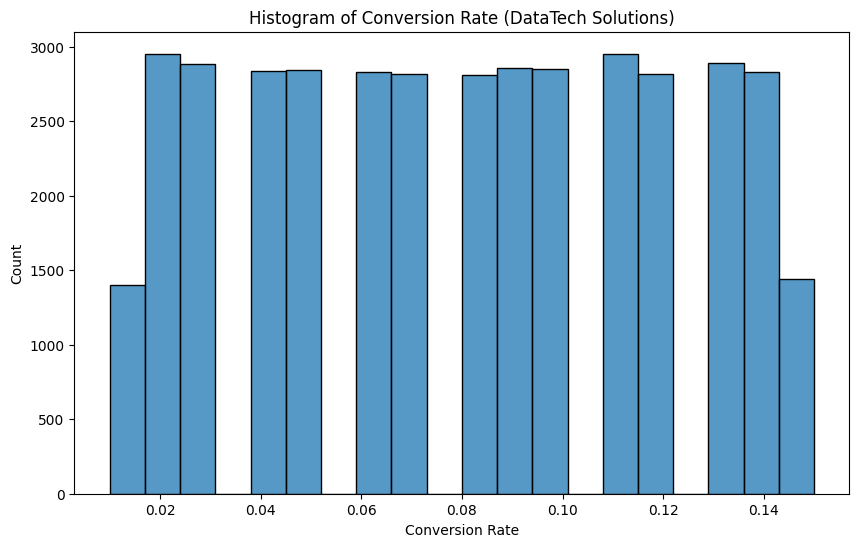

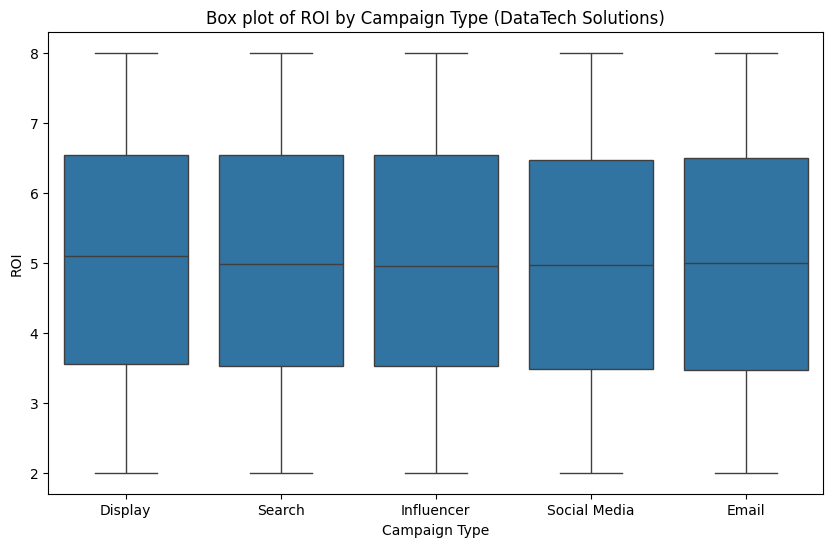

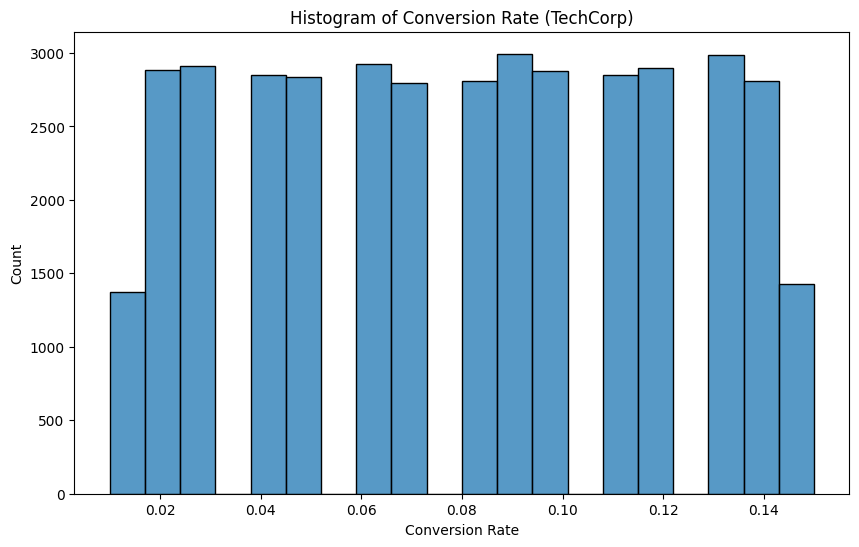

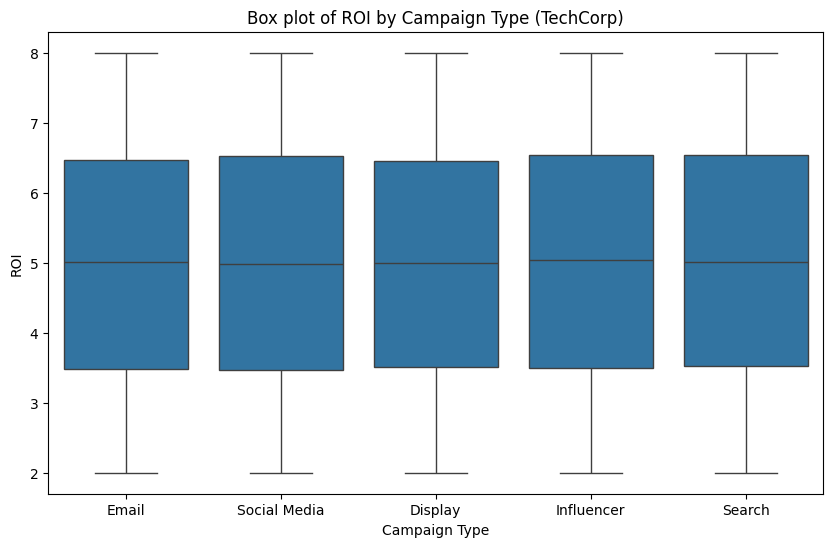

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


def visualize_conversion_rate(company: str, df: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Conversion_Rate', bins=20)
    plt.title(f'Histogram of Conversion Rate ({company})')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Count')
    plt.show()

def visualize_roi_by_campaign_type(company: str, df: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Campaign_Type', y='ROI')
    plt.title(f'Box plot of ROI by Campaign Type ({company})')
    plt.xlabel('Campaign Type')
    plt.ylabel('ROI')
    plt.show()

for company, df in map_df_by_company.items():
    visualize_conversion_rate(company=company, df=df)
    visualize_roi_by_campaign_type(company=company, df=df)

In [63]:
df

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
9,10,TechCorp,Email,Women 35-44,15 days,Instagram,0.09,"$13,766.00",3.78,Los Angeles,English,642,3856,3,Tech Enthusiasts,2021-01-10
12,13,TechCorp,Social Media,Men 25-34,60 days,Facebook,0.09,"$17,189.00",4.91,Chicago,Mandarin,677,8817,10,Tech Enthusiasts,2021-01-13
13,14,TechCorp,Email,Men 25-34,45 days,Instagram,0.14,"$9,975.00",7.06,New York,German,994,2201,4,Health & Wellness,2021-01-14
14,15,TechCorp,Display,All Ages,45 days,Website,0.04,"$11,346.00",5.28,Chicago,Spanish,482,8470,1,Outdoor Adventurers,2021-01-15
21,22,TechCorp,Influencer,All Ages,30 days,Facebook,0.02,"$12,824.00",6.21,New York,French,319,8586,2,Foodies,2021-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199984,199985,TechCorp,Email,Men 18-24,60 days,Website,0.08,"$19,503.00",6.50,Chicago,French,981,6984,4,Outdoor Adventurers,2021-11-26
199985,199986,TechCorp,Search,Women 35-44,30 days,Website,0.04,"$18,294.00",4.58,Houston,German,964,8738,7,Outdoor Adventurers,2021-11-27
199987,199988,TechCorp,Display,Men 18-24,60 days,Website,0.11,"$17,471.00",2.30,New York,German,999,9725,2,Tech Enthusiasts,2021-11-29
199990,199991,TechCorp,Email,Men 25-34,15 days,Website,0.07,"$15,797.00",6.55,Chicago,Mandarin,470,5927,7,Fashionistas,2021-12-02


In [64]:
map_df_by_channel_used = dict()
for channel in df["Channel_Used"].unique():
    d = df[df["Channel_Used"] == channel]
    map_df_by_channel_used[channel] = d
    print(f"\n{channel}'s DataFrame")
    display(d)


Instagram's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
9,10,TechCorp,Email,Women 35-44,15 days,Instagram,0.09,"$13,766.00",3.78,Los Angeles,English,642,3856,3,Tech Enthusiasts,2021-01-10
13,14,TechCorp,Email,Men 25-34,45 days,Instagram,0.14,"$9,975.00",7.06,New York,German,994,2201,4,Health & Wellness,2021-01-14
35,36,TechCorp,Display,Men 25-34,60 days,Instagram,0.09,"$13,256.00",2.51,Miami,German,250,7373,3,Health & Wellness,2021-02-05
149,150,TechCorp,Search,Women 35-44,60 days,Instagram,0.14,"$6,896.00",2.15,Houston,German,693,1290,1,Foodies,2021-05-30
154,155,TechCorp,Social Media,Women 35-44,30 days,Instagram,0.13,"$13,157.00",4.41,New York,German,724,9573,6,Fashionistas,2021-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199819,199820,TechCorp,Influencer,All Ages,30 days,Instagram,0.04,"$19,564.00",3.74,Los Angeles,English,933,9209,8,Tech Enthusiasts,2021-06-14
199842,199843,TechCorp,Display,Men 18-24,60 days,Instagram,0.10,"$5,385.00",6.88,Los Angeles,French,369,2489,1,Tech Enthusiasts,2021-07-07
199923,199924,TechCorp,Email,Women 35-44,15 days,Instagram,0.10,"$6,339.00",6.55,Chicago,English,880,8879,7,Health & Wellness,2021-09-26
199933,199934,TechCorp,Email,Men 25-34,60 days,Instagram,0.14,"$9,970.00",6.29,Houston,Mandarin,161,9072,9,Fashionistas,2021-10-06



Facebook's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
12,13,TechCorp,Social Media,Men 25-34,60 days,Facebook,0.09,"$17,189.00",4.91,Chicago,Mandarin,677,8817,10,Tech Enthusiasts,2021-01-13
21,22,TechCorp,Influencer,All Ages,30 days,Facebook,0.02,"$12,824.00",6.21,New York,French,319,8586,2,Foodies,2021-01-22
48,49,TechCorp,Display,All Ages,60 days,Facebook,0.10,"$9,510.00",5.25,Houston,French,190,2071,4,Tech Enthusiasts,2021-02-18
52,53,TechCorp,Email,Men 18-24,30 days,Facebook,0.13,"$15,428.00",7.62,Houston,French,385,4937,6,Tech Enthusiasts,2021-02-22
68,69,TechCorp,Display,All Ages,15 days,Facebook,0.03,"$11,864.00",7.98,Chicago,French,932,9973,9,Tech Enthusiasts,2021-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199712,199713,TechCorp,Social Media,Women 25-34,60 days,Facebook,0.07,"$9,543.00",4.87,Chicago,German,407,4526,1,Outdoor Adventurers,2021-02-27
199777,199778,TechCorp,Search,Men 18-24,15 days,Facebook,0.05,"$6,589.00",5.37,Miami,German,347,8332,3,Outdoor Adventurers,2021-05-03
199840,199841,TechCorp,Display,All Ages,30 days,Facebook,0.01,"$17,751.00",2.81,Houston,English,631,5311,6,Fashionistas,2021-07-05
199865,199866,TechCorp,Email,Men 18-24,15 days,Facebook,0.13,"$8,578.00",4.94,Chicago,Mandarin,451,2422,4,Health & Wellness,2021-07-30



Website's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
14,15,TechCorp,Display,All Ages,45 days,Website,0.04,"$11,346.00",5.28,Chicago,Spanish,482,8470,1,Outdoor Adventurers,2021-01-15
117,118,TechCorp,Social Media,All Ages,45 days,Website,0.05,"$5,174.00",4.98,Houston,German,438,9741,1,Tech Enthusiasts,2021-04-28
151,152,TechCorp,Influencer,Women 35-44,60 days,Website,0.06,"$7,031.00",5.67,Houston,French,404,8033,6,Tech Enthusiasts,2021-06-01
160,161,TechCorp,Search,All Ages,45 days,Website,0.05,"$15,993.00",6.55,Miami,English,616,9536,8,Fashionistas,2021-06-10
170,171,TechCorp,Social Media,Men 25-34,30 days,Website,0.06,"$12,886.00",4.62,Miami,Mandarin,668,2507,8,Foodies,2021-06-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199983,199984,TechCorp,Influencer,Women 35-44,60 days,Website,0.01,"$12,082.00",7.52,Miami,French,142,5026,10,Fashionistas,2021-11-25
199984,199985,TechCorp,Email,Men 18-24,60 days,Website,0.08,"$19,503.00",6.50,Chicago,French,981,6984,4,Outdoor Adventurers,2021-11-26
199985,199986,TechCorp,Search,Women 35-44,30 days,Website,0.04,"$18,294.00",4.58,Houston,German,964,8738,7,Outdoor Adventurers,2021-11-27
199987,199988,TechCorp,Display,Men 18-24,60 days,Website,0.11,"$17,471.00",2.30,New York,German,999,9725,2,Tech Enthusiasts,2021-11-29



YouTube's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
27,28,TechCorp,Email,Men 25-34,30 days,YouTube,0.07,"$6,601.00",3.29,New York,Spanish,604,2420,3,Foodies,2021-01-28
67,68,TechCorp,Search,Women 25-34,60 days,YouTube,0.12,"$7,823.00",2.72,New York,Mandarin,240,2512,6,Tech Enthusiasts,2021-03-09
72,73,TechCorp,Social Media,Women 35-44,15 days,YouTube,0.13,"$16,635.00",7.46,Miami,English,576,9999,10,Health & Wellness,2021-03-14
85,86,TechCorp,Social Media,All Ages,30 days,YouTube,0.13,"$7,515.00",7.38,Houston,Mandarin,635,8489,3,Foodies,2021-03-27
101,102,TechCorp,Search,Men 18-24,45 days,YouTube,0.09,"$9,941.00",4.54,Chicago,English,207,8334,4,Tech Enthusiasts,2021-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199851,199852,TechCorp,Search,Women 25-34,30 days,YouTube,0.02,"$13,485.00",2.22,Houston,Spanish,936,7729,5,Foodies,2021-07-16
199869,199870,TechCorp,Display,Women 25-34,45 days,YouTube,0.06,"$16,329.00",7.16,Chicago,Spanish,266,6165,10,Tech Enthusiasts,2021-08-03
199879,199880,TechCorp,Social Media,Women 35-44,45 days,YouTube,0.03,"$9,132.00",2.43,Chicago,German,700,3744,9,Outdoor Adventurers,2021-08-13
199974,199975,TechCorp,Influencer,Women 35-44,30 days,YouTube,0.03,"$11,614.00",6.47,New York,English,194,2797,4,Fashionistas,2021-11-16



Email's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
28,29,TechCorp,Influencer,Men 18-24,60 days,Email,0.09,"$11,552.00",7.12,Chicago,Spanish,384,7620,7,Tech Enthusiasts,2021-01-29
29,30,TechCorp,Social Media,Women 25-34,30 days,Email,0.09,"$11,608.00",3.61,Los Angeles,Spanish,952,4055,1,Tech Enthusiasts,2021-01-30
49,50,TechCorp,Social Media,Women 25-34,45 days,Email,0.11,"$7,521.00",3.98,Los Angeles,German,150,7377,8,Tech Enthusiasts,2021-02-19
61,62,TechCorp,Email,Men 25-34,30 days,Email,0.09,"$13,848.00",5.32,Los Angeles,French,261,1958,2,Tech Enthusiasts,2021-03-03
91,92,TechCorp,Email,Men 25-34,45 days,Email,0.09,"$17,705.00",7.00,New York,Spanish,628,9545,4,Outdoor Adventurers,2021-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199853,199854,TechCorp,Display,Men 18-24,30 days,Email,0.15,"$14,001.00",7.31,Chicago,German,573,5158,6,Fashionistas,2021-07-18
199855,199856,TechCorp,Social Media,Men 25-34,45 days,Email,0.02,"$8,964.00",5.96,New York,Mandarin,926,7276,3,Outdoor Adventurers,2021-07-20
199867,199868,TechCorp,Display,Men 18-24,15 days,Email,0.12,"$11,976.00",2.04,Chicago,French,834,1091,5,Fashionistas,2021-08-01
199931,199932,TechCorp,Social Media,Women 35-44,30 days,Email,0.13,"$17,179.00",7.98,New York,German,525,1069,5,Health & Wellness,2021-10-04



Google Ads's DataFrame


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
106,107,TechCorp,Influencer,Men 25-34,45 days,Google Ads,0.11,"$14,875.00",6.50,New York,German,306,1560,3,Health & Wellness,2021-04-17
112,113,TechCorp,Display,Women 35-44,30 days,Google Ads,0.02,"$19,035.00",2.01,Miami,Mandarin,560,6945,7,Health & Wellness,2021-04-23
145,146,TechCorp,Search,Men 25-34,60 days,Google Ads,0.03,"$7,428.00",4.72,Houston,Mandarin,556,5179,4,Tech Enthusiasts,2021-05-26
162,163,TechCorp,Email,Women 25-34,15 days,Google Ads,0.04,"$9,858.00",3.09,Los Angeles,Spanish,957,4396,9,Tech Enthusiasts,2021-06-12
169,170,TechCorp,Search,All Ages,30 days,Google Ads,0.07,"$10,690.00",5.41,Los Angeles,English,797,1306,9,Foodies,2021-06-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199874,199875,TechCorp,Social Media,Men 25-34,45 days,Google Ads,0.12,"$8,613.00",7.12,Chicago,German,521,9322,7,Foodies,2021-08-08
199890,199891,TechCorp,Display,Men 18-24,30 days,Google Ads,0.11,"$17,189.00",6.92,Los Angeles,Mandarin,811,6754,7,Foodies,2021-08-24
199902,199903,TechCorp,Display,Women 35-44,60 days,Google Ads,0.07,"$15,373.00",2.92,Chicago,Spanish,766,1772,6,Health & Wellness,2021-09-05
199960,199961,TechCorp,Search,Women 35-44,45 days,Google Ads,0.14,"$11,491.00",4.52,Chicago,French,732,5029,9,Outdoor Adventurers,2021-11-02


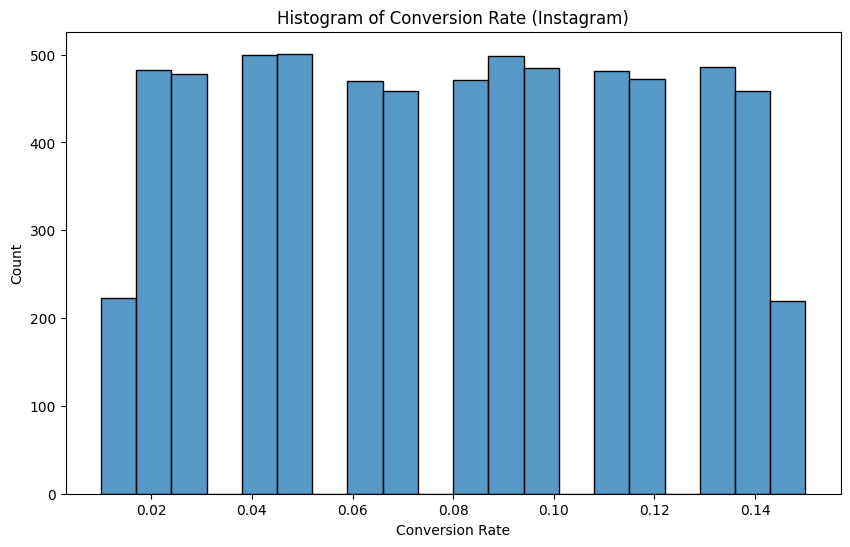

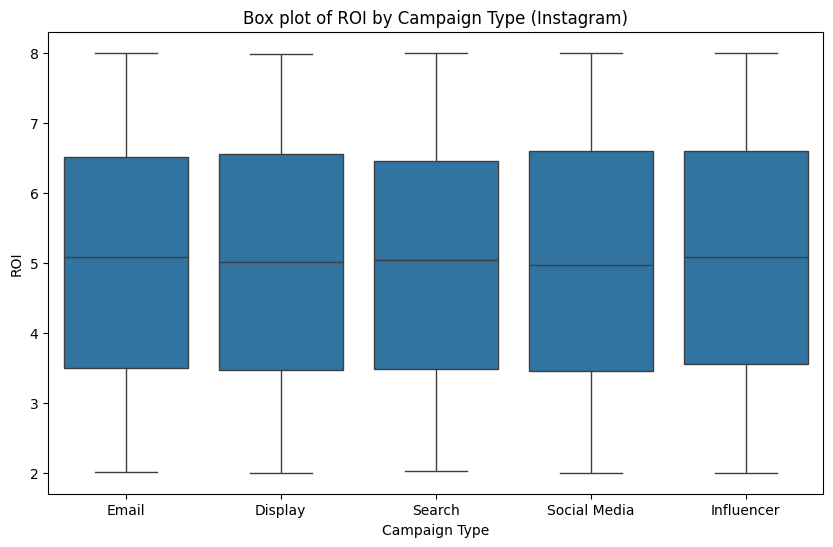

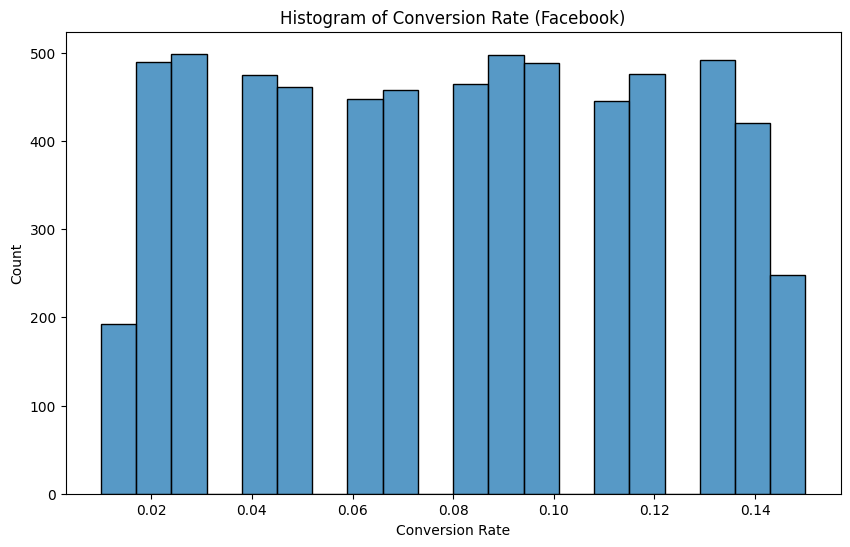

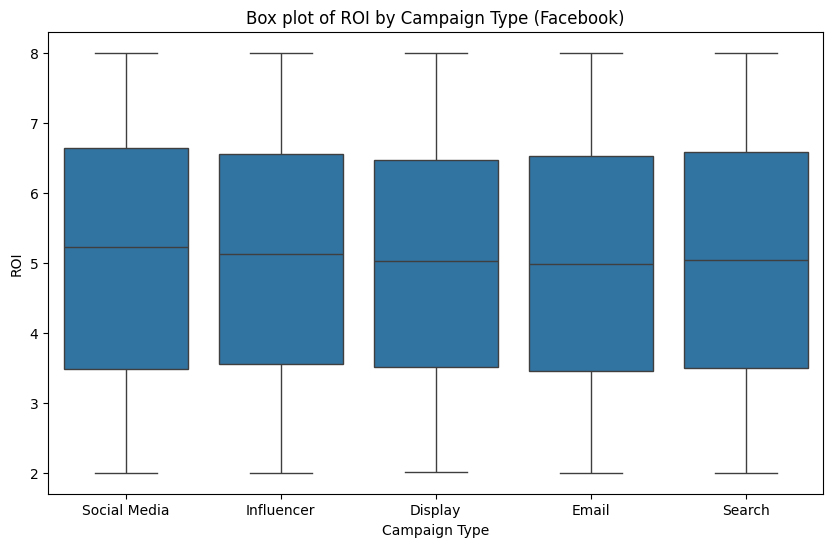

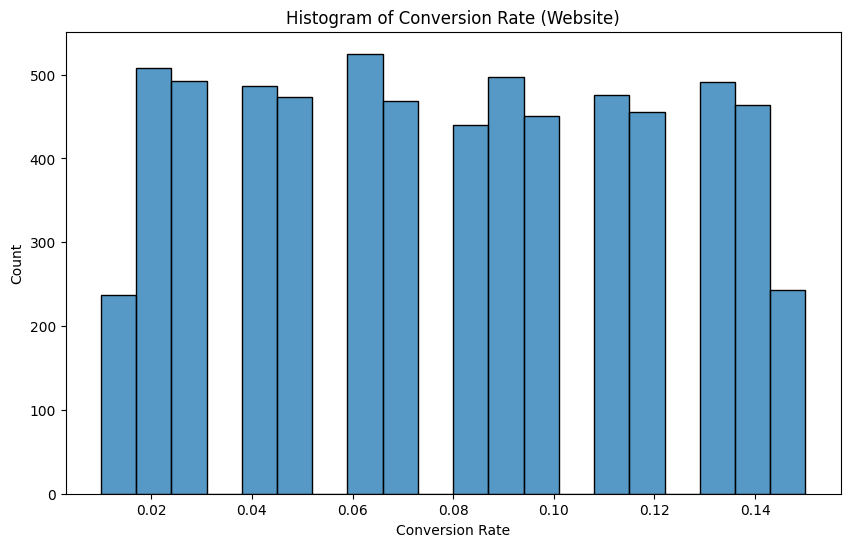

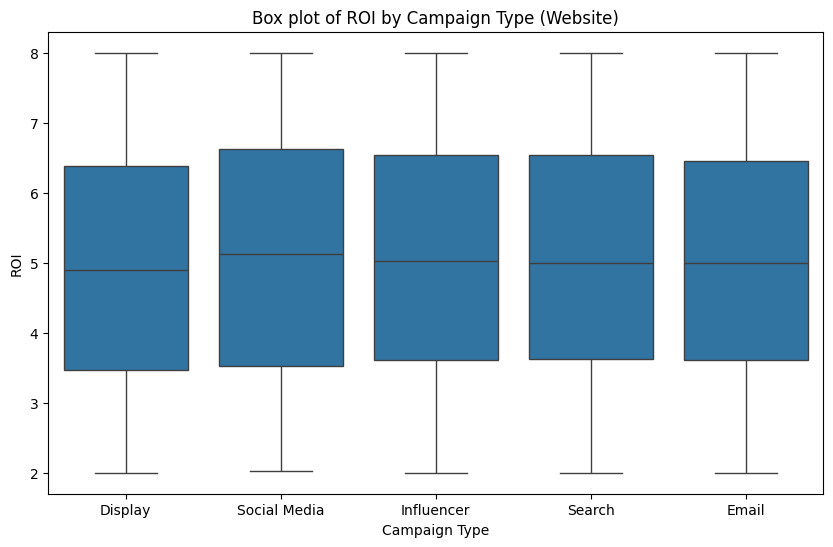

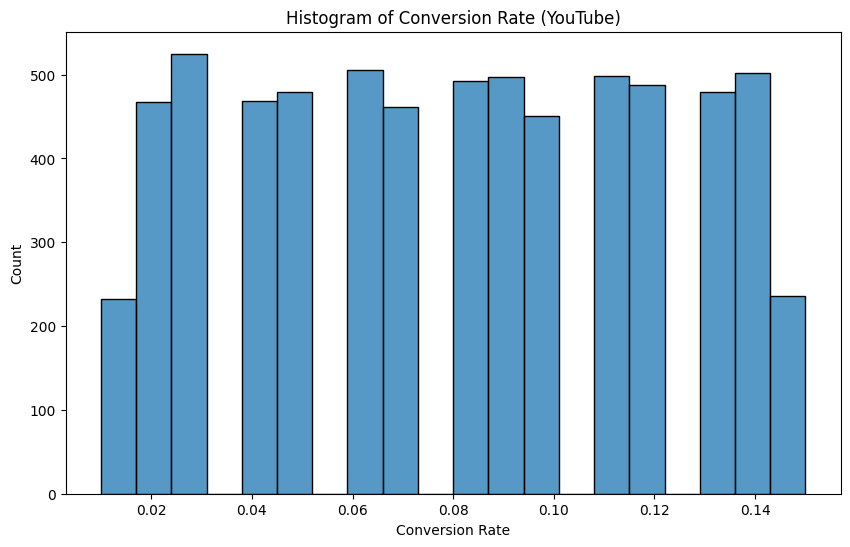

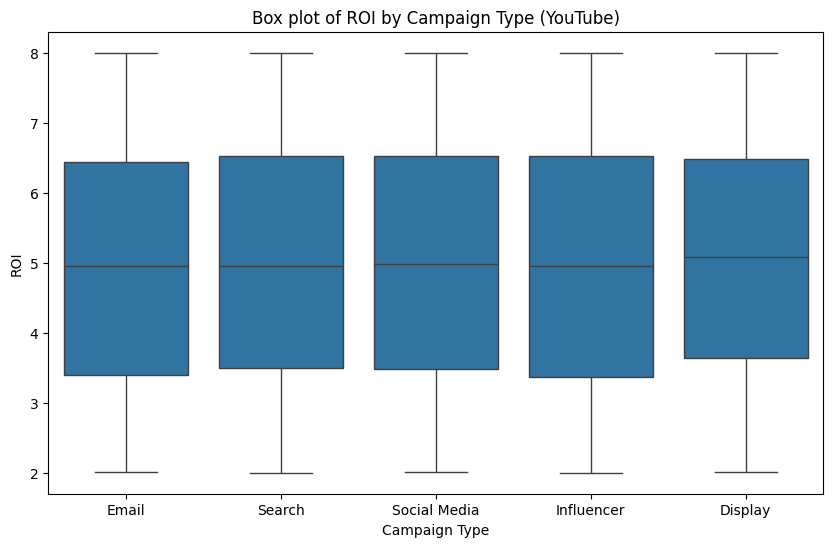

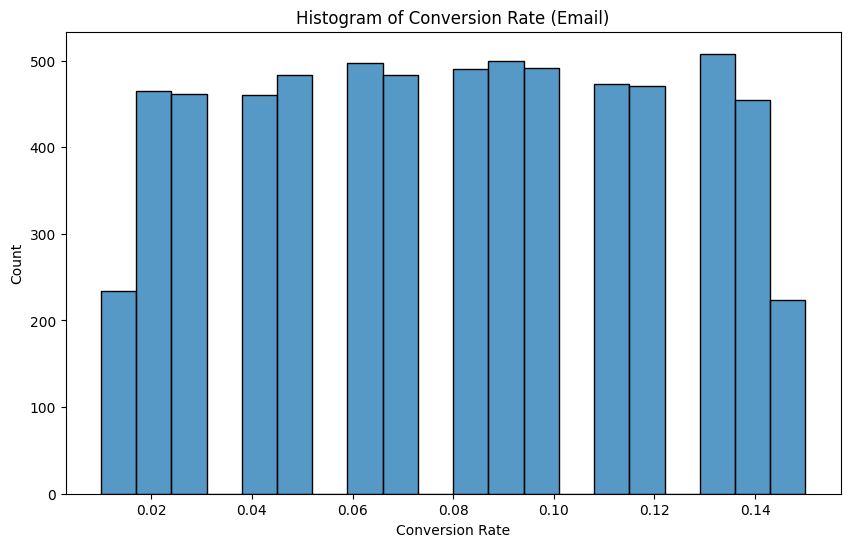

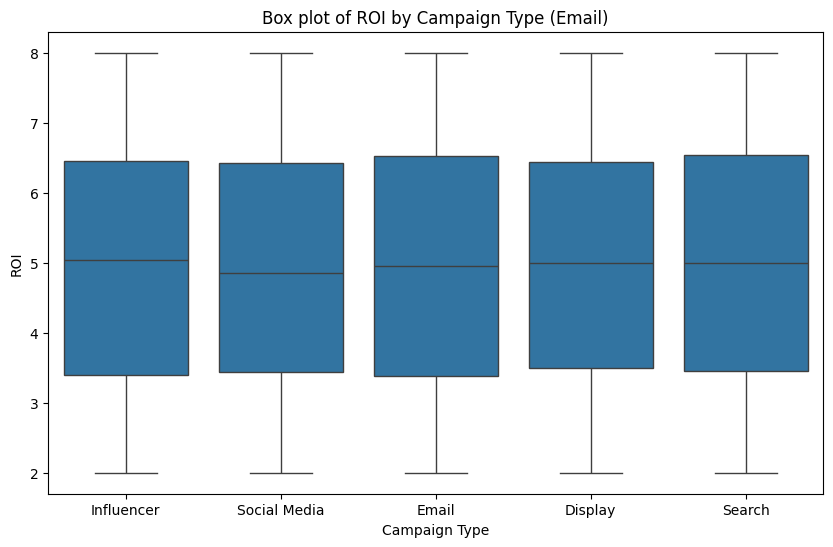

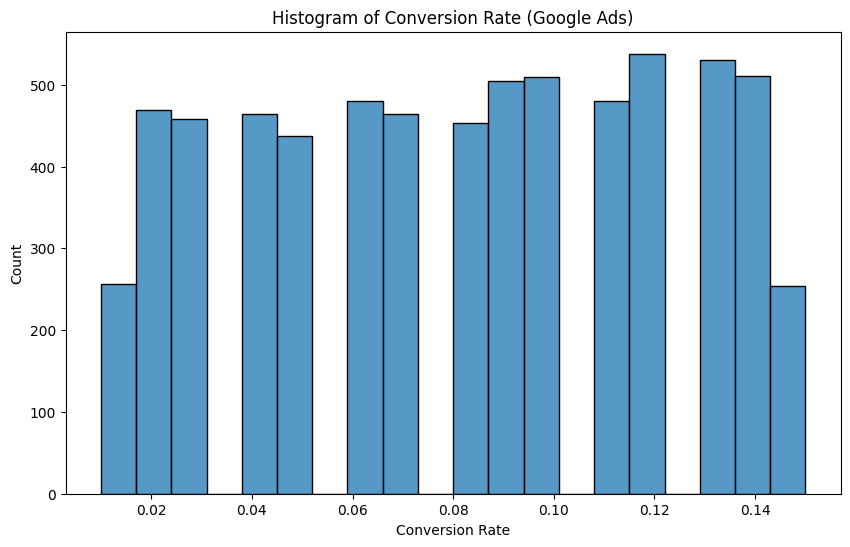

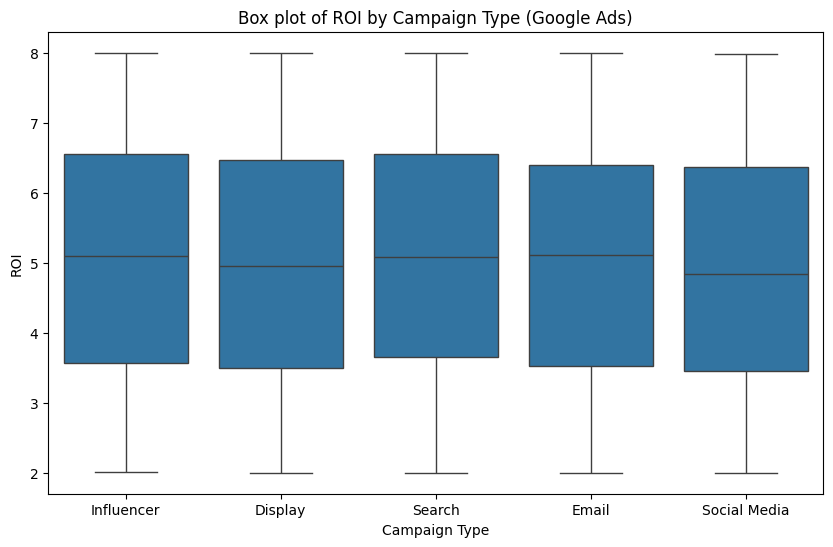

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


def visualize_conversion_rate(channel: str, df: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Conversion_Rate', bins=20)
    plt.title(f'Histogram of Conversion Rate ({channel})')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Count')
    plt.show()

def visualize_roi_by_campaign_type(channel: str, df: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Campaign_Type', y='ROI')
    plt.title(f'Box plot of ROI by Campaign Type ({channel})')
    plt.xlabel('Campaign Type')
    plt.ylabel('ROI')
    plt.show()

for channel, df in map_df_by_channel_used.items():
    visualize_conversion_rate(channel=channel, df=df)
    visualize_roi_by_campaign_type(channel=channel, df=df)

In [68]:
map_df_by_channel_used = dict()
for channel in df["Channel_Used"].unique():
    d = df[df["Channel_Used"] == channel]
    map_df_by_channel_used[channel] = d
    print(f"\n{channel}'s DataFrame")
    display(d)

import seaborn as sns
import matplotlib.pyplot as plt


def visualize_conversion_rate(channel: str, df: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Conversion_Rate', bins=20)
    plt.title(f'Histogram of Conversion Rate ({channel})')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Count')
    plt.show()

def visualize_roi_by_campaign_type(channel: str, df: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Campaign_Type', y='ROI')
    plt.title(f'Box plot of ROI by Campaign Type ({channel})')
    plt.xlabel('Campaign Type')
    plt.ylabel('ROI')
    plt.show()

for channel, df in map_df_by_channel_used.items():
    visualize_conversion_rate(channel=channel, df=df)
    visualize_roi_by_campaign_type(channel=channel, df=df)

106          107
112          113
145          146
162          163
169          170
           ...  
199874    199875
199890    199891
199902    199903
199960    199961
199995    199996
Name: Campaign_ID, Length: 6810, dtype: int64
106       TechCorp
112       TechCorp
145       TechCorp
162       TechCorp
169       TechCorp
            ...   
199874    TechCorp
199890    TechCorp
199902    TechCorp
199960    TechCorp
199995    TechCorp
Name: Company, Length: 6810, dtype: object
106         Influencer
112            Display
145             Search
162              Email
169             Search
              ...     
199874    Social Media
199890         Display
199902         Display
199960          Search
199995         Display
Name: Campaign_Type, Length: 6810, dtype: object
106         Men 25-34
112       Women 35-44
145         Men 25-34
162       Women 25-34
169          All Ages
             ...     
199874      Men 25-34
199890      Men 18-24
199902    Women 35-44
199960    Women